In [1]:
# 上位インポート先を追加
import os,sys
sys.path.append(os.path.join(os.path.dirname('__file__'), '..'))

from sentinelimagerest.sentinelimagerest import SentinelImageREST

In [2]:
# 画像取得したいポリゴン座標
coords = [[
    [141.532745,42.983993],
    [141.532745,42.998056],
    [141.567507,42.998056],
    [141.567507,42.983993],
    [141.532745,42.983993]
]]

field_name = 'usage_rest'
# 対象期間（開始）
start_date ='2022-04-15'
# 対象期間（終了）
end_date = '2022-9-15'
# 雲被覆率フィルタリングの上限値
cloudy_pixel_percentage_limit = 25
# 出力先フォルダ（相対パス）
output_dir = './'


# SentinelImageRESTクラスオブジェクトの作成
obj = SentinelImageREST(coords, start_date, end_date, cloudy_pixel_percentage_limit,output_dir,field_name)

# 対象圃場の衛星データ撮影日をリストで取得
shootingdate_list = obj.get_shootingdate_list()
print(shootingdate_list)

['2022-05-17', '2022-06-21', '2022-08-25', '2022-09-04', '2022-09-09', '2022-09-14']


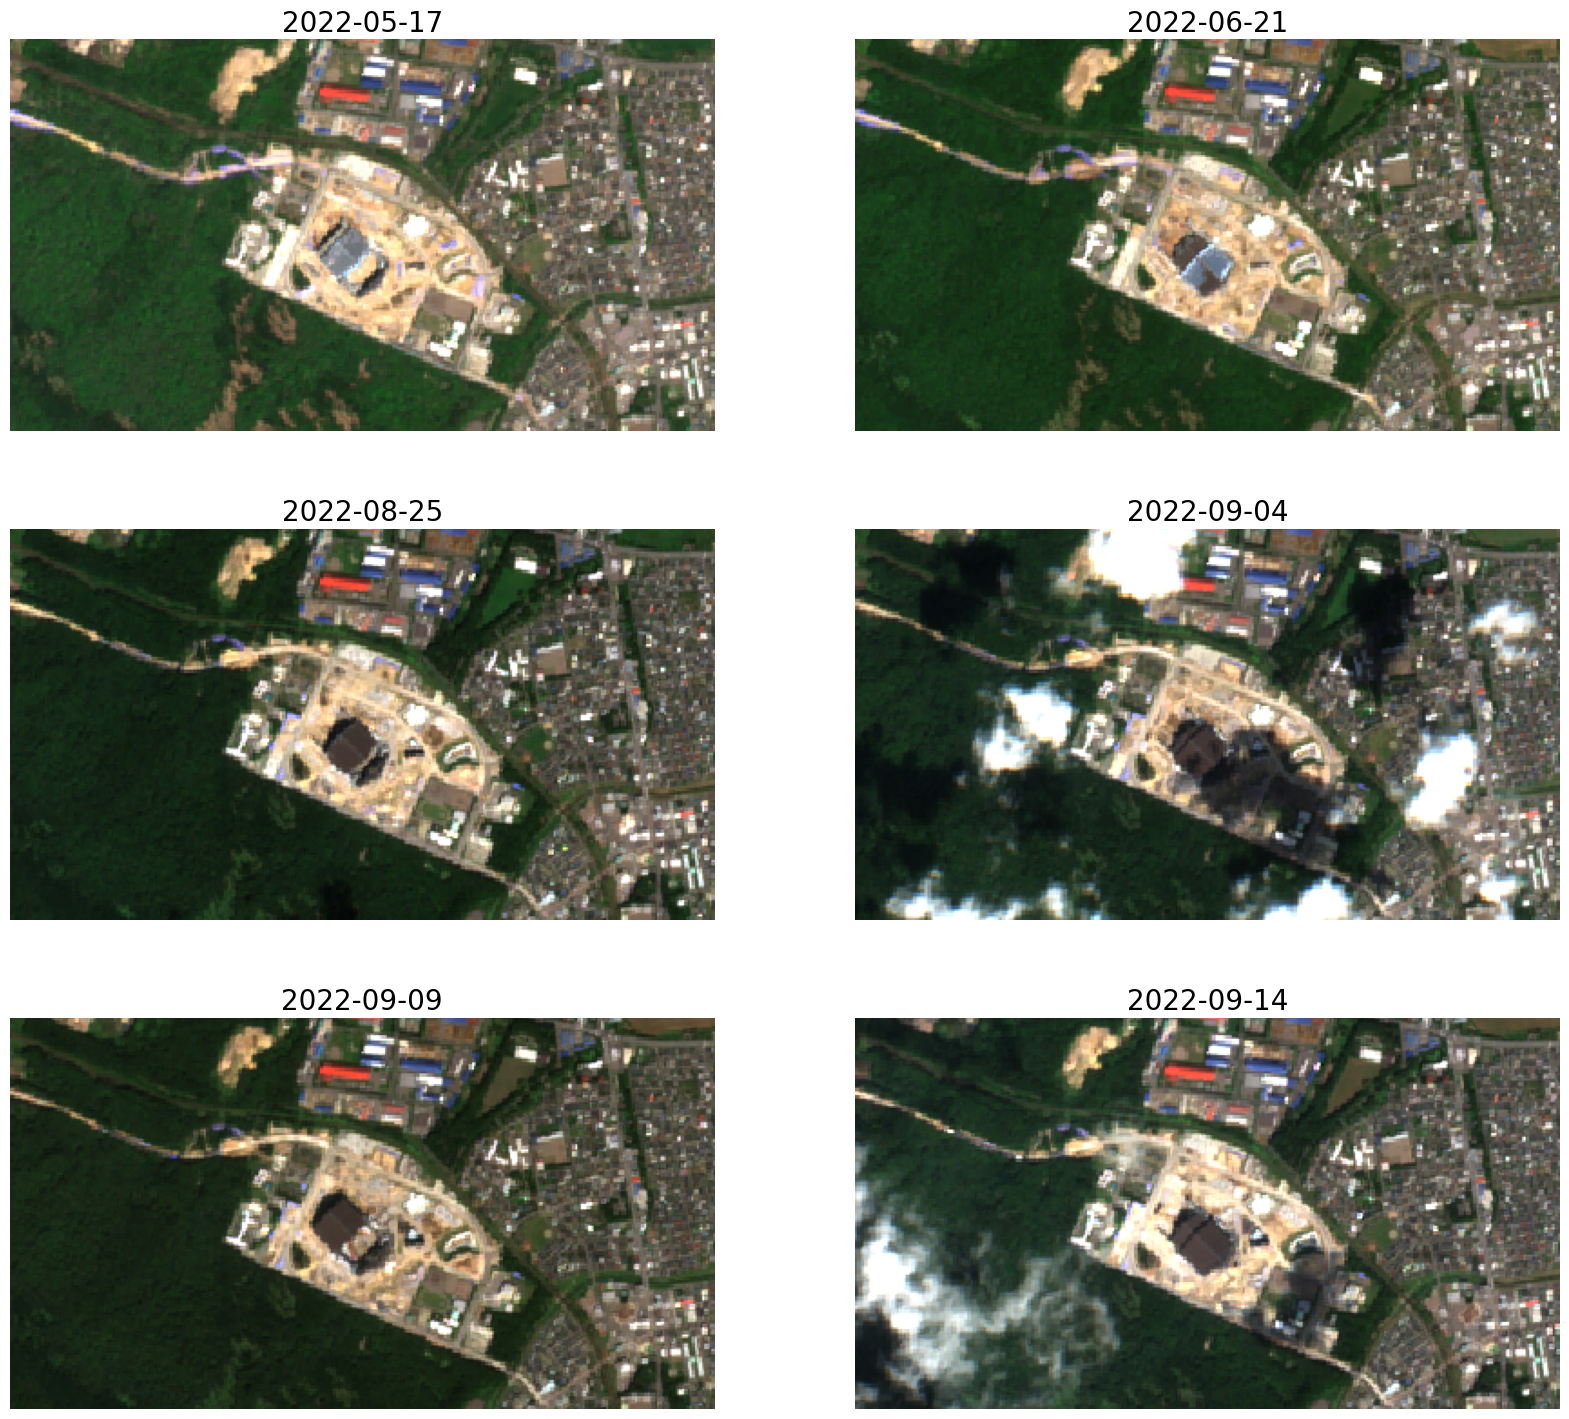

In [3]:
import math
import matplotlib.pyplot as plt

shootingdate_list_length = len(shootingdate_list)
vertical_length = math.ceil(shootingdate_list_length/2)

plt.figure(figsize=(20,vertical_length*6))

cnt = 0

for idx, shootingdate in enumerate(shootingdate_list):
    
    cnt += 1

    plt.subplot(vertical_length,2,cnt)
    plt.title(shootingdate,fontsize=20)
    plt.axis('off')

    img = obj.get_numpy_tc_for_matplotlib(shootingdate)
    plt.imshow(img)

In [9]:
obj.get_geotiff_tc()

download TrueColor GeoTIFF... 1 / 6
download TrueColor GeoTIFF... 2 / 6
download TrueColor GeoTIFF... 3 / 6
download TrueColor GeoTIFF... 4 / 6
download TrueColor GeoTIFF... 5 / 6
download TrueColor GeoTIFF... 6 / 6


In [7]:
import folium
import numpy as np

In [10]:
def bounds_centroid(bounds):
    arr = np.array(bounds)
    return ((arr[0] + arr[1]) / 2).tolist()

content = obj.get_numpy_tc('2021-07-16')



In [15]:
print(type(content['image']))

<class 'bytes'>


In [14]:
folium_map = folium.Map(
    location=bounds_centroid(content['bounds']),
    zoom_start=15,
)


image = folium.raster_layers.ImageOverlay(
            # image = './usage_rest_tc_2022-09-14.tif', 
            image = content['image'], 
            bounds= content['bounds'],
            name = shootingdate,
            interactive=True,
            zindex=1,
        )

image.add_to(folium_map)

folium.LayerControl(collapsed=False).add_to(folium_map)
folium_map


TypeError: Object of type bytes is not JSON serializable